## Notebook Imports and Packages

In [267]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sympy import symbols,diff
%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1


In [3]:
# Make Data
x_1 = np.linspace(start=-3,stop=3,num=100)

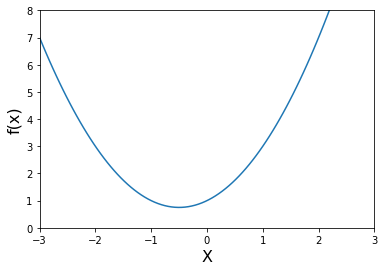

In [4]:
plt.plot(x_1,f(x_1))
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel("X",fontsize=16)
plt.ylabel('f(x)',fontsize=16);

## Slope & Derivatives

In [5]:
def df(x):
    return 2 * x + 1

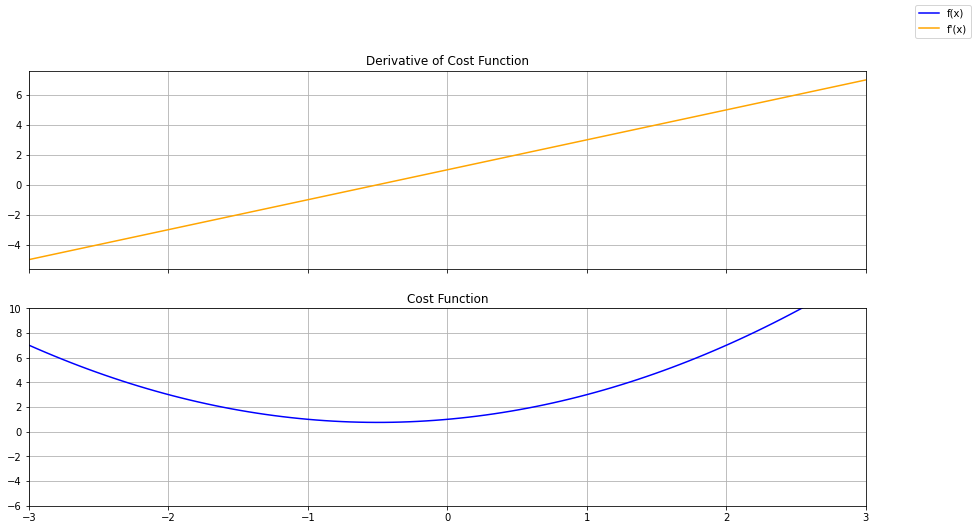

In [6]:
# plot function and derviate side by side
fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(2,1,2)
ax2 = fig.add_subplot(2,1,1)
ax.plot(x_1,f(x_1),label='f(x)',color='blue')
ax2.plot(x_1,df(x_1),label="f'(x)",color='orange')
ax.set_xlim(-3,3)
ax.set_title("Cost Function")
ax2.set_xlim(-3,3)
ax.set_ylim(-6,10)
#ax2.set_ylim(-6,10)
ax2.set_title("Derivative of Cost Function")
ax2.tick_params(axis='x',labelbottom=False)
ax.grid()
ax2.grid()
fig.legend()

# Gradient Descent

In [7]:
# Gradient Descent
new_x = -3
previous_x = 0
learning_rate = 0.1
steps = 100
x_list = []

precision = 0.0001
for i in range(steps):
    previous_x = new_x
    x_list.append(previous_x)
    gradient = df(previous_x)
    new_x = previous_x - learning_rate * gradient
    
    step_size = abs(new_x - previous_x)
    if step_size <= precision:
        print(f"Loop ran {i + 1} times")
        break
    
print('Local minimum occurs at:',new_x)
print('Slope or df(x) value at this point is ',df(new_x))
print('f(x) value or cost at this point is:',f(new_x))

Loop ran 40 times
Local minimum occurs at: -0.5003323069989462
Slope or df(x) value at this point is  -0.0006646139978923049
f(x) value or cost at this point is: 0.7500001104279416


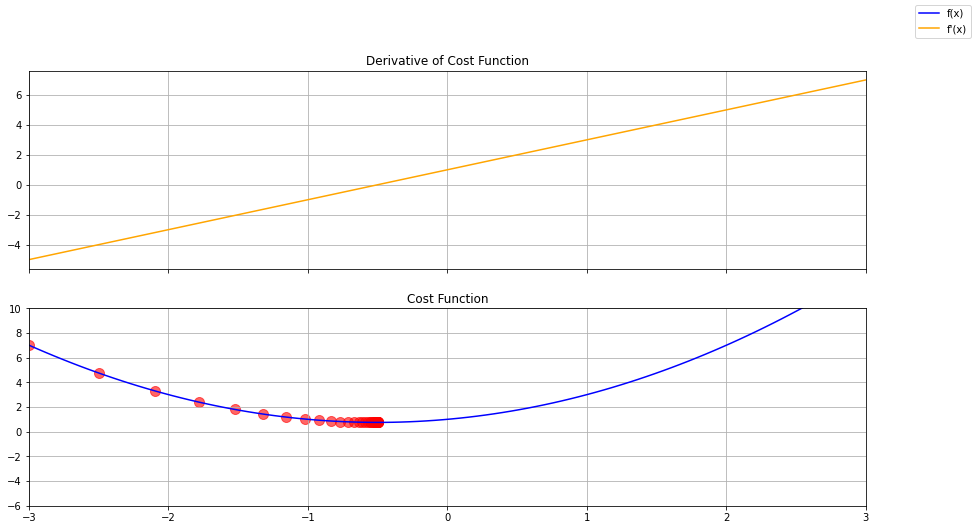

In [8]:
# plot function and derviate side by side
fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(2,1,2)
ax2 = fig.add_subplot(2,1,1)
ax.plot(x_1,f(x_1),label='f(x)',color='blue')
ax2.plot(x_1,df(x_1),label="f'(x)",color='orange')
ax.set_xlim(-3,3)
ax.set_title("Cost Function")
ax2.set_xlim(-3,3)
ax.set_ylim(-6,10)
#ax2.set_ylim(-6,10)
ax2.set_title("Derivative of Cost Function")
ax2.tick_params(axis='x',labelbottom=False)
ax.scatter(x_list,f(np.array(x_list)),s=100,alpha=0.6,c='red')
ax.grid()
ax2.grid()
fig.legend()

## Example 2- Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 +5$$

In [9]:
x_2 = np.linspace(-2,2,1000)

In [10]:
def g(x):
    return x**4 -4*x**2 + 5

def dg(x):
    return 4 * x**3 - 8*x

(-2.0, 2.0)

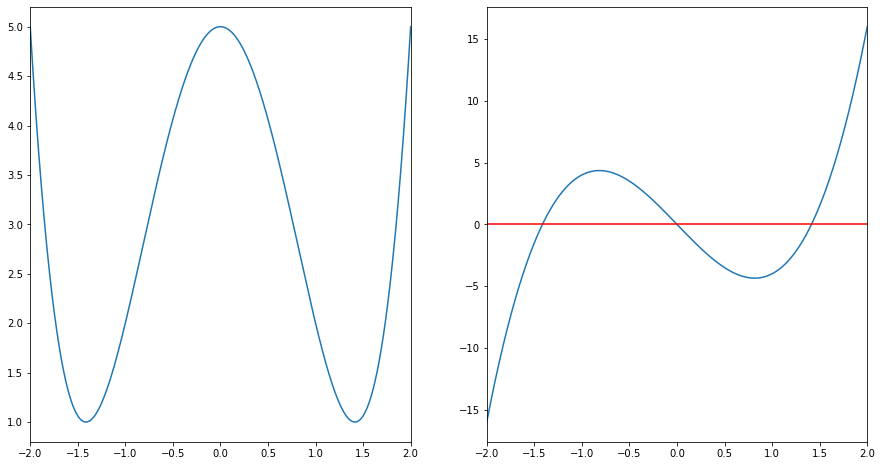

In [11]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,2,1)
ax.plot(x_2,g(x_2))
ax2 = fig.add_subplot(1,2,2)
ax2.plot(x_2,dg(x_2))
ax2.set_xlim(-2,2)
ax2.axhline(y=0,color='red')
ax.set_xlim(-2,2)


In [62]:
# Gradient Descent


def gradient_descent(derivative_func,initial_guess,learning_rate=0.02,precision=0.0001,max_iter=300):
    new_x = initial_guess
    previous_x = 0
    steps = 500
    x_list = []
    

    precision = 0.0001
    for i in range(max_iter):
        previous_x = new_x
        x_list.append(previous_x)
        gradient = derivative_func(previous_x)
        new_x = previous_x - learning_rate * gradient

        step_size = abs(new_x - previous_x)
        if step_size <= precision:
            break

    
    
    return new_x,x_list

In [13]:
local_min,list_x = gradient_descent(dg,0.5)
print(local_min)
print(len(list_x))


1.4137636556157256
55


(-2.0, 2.0)

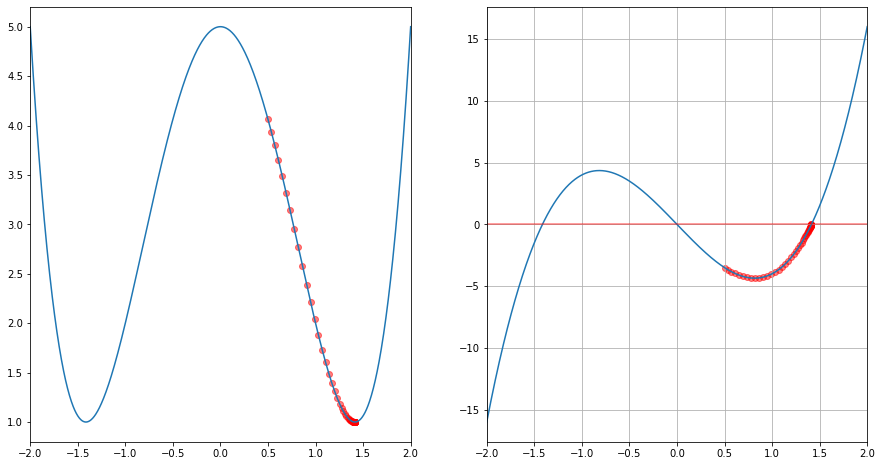

In [14]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,2,1)
ax.plot(x_2,g(x_2))
ax.scatter(list_x,g(np.array(list_x)),color='red',alpha=0.5)
ax2 = fig.add_subplot(1,2,2)
ax2.plot(x_2,dg(x_2))
ax2.scatter(list_x,dg(np.array(list_x)),color='red',alpha=0.5)
ax2.axhline(y=0,color='red',alpha=0.5)
ax2.set_xlim(-2,2)
ax2.grid()
ax.set_xlim(-2,2)


# Divergence and Overflow

## $$h(x) = x^5 -2x^4 + 2$$

In [18]:
x_3 = np.linspace(-2.5,2.5,1000)

def h(x):
    return x**5 -2 *x**4 + 2


def dh(x):
    return 5* x**4 - 8* x**3

-1.8398461123332792e+24
5.729226632843199e+97
-2.1081790694225687e+121
71


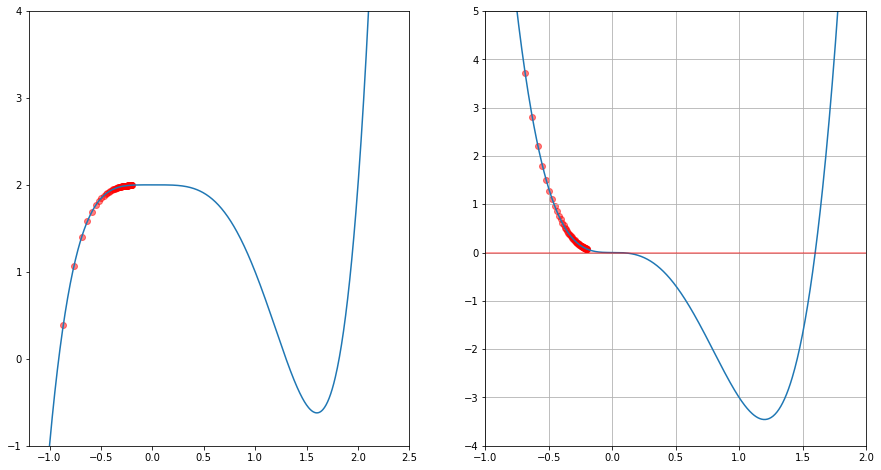

In [64]:
# plot function and derviate side by side
initial_guess = -0.2
local_min,list_x = gradient_descent(dh,initial_guess,max_iter=71)




fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,2,1)
ax.plot(x_3,h(x_3))
ax.set_xlim(-1.2,2.5)
ax.set_ylim(-1,4)
ax.scatter(list_x,h(np.array(list_x)),color='red',alpha=0.5)
ax2 = fig.add_subplot(1,2,2)
ax2.plot(x_3,dh(x_3))
ax2.scatter(list_x,dh(np.array(list_x)),color='red',alpha=0.5)
ax2.axhline(y=0,color='red',alpha=0.5)
ax2.set_xlim(-1,2)
ax2.set_ylim(-4,5)
ax2.grid()
print(local_min)
print(dh(local_min))
print(h(local_min))
print(len(list_x))

In [36]:
import sys
sys.float_info.max

1.7976931348623157e+308

# Learning Rate

In [72]:
initial_guess = 1.9
local_min,list_x = gradient_descent(dg,initial_guess,learning_rate=0.02,max_iter=500)
print(local_min)
print(len(list_x))

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,2,1)
ax.plot(x_2,g(x_2))
ax.scatter(list_x,g(np.array(list_x)),color='red',alpha=0.5)
ax2 = fig.add_subplot(1,2,2)
ax2.plot(x_2,dg(x_2))
ax2.scatter(list_x,dg(np.array(list_x)),color='red',alpha=0.5)
ax2.axhline(y=0,color='red',alpha=0.5)
ax2.set_xlim(-2,2)
ax2.grid()
ax.set_xlim(-2,2)


print(f'Number of steps: {len(list_x)}')

OverflowError: (34, 'Result too large')

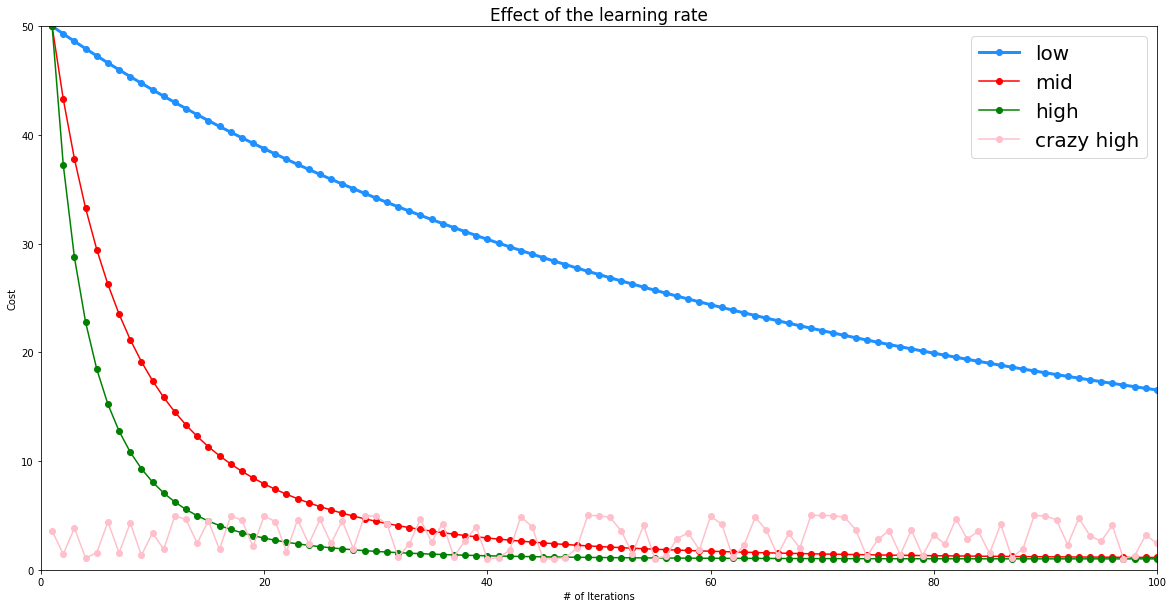

In [100]:
initial_guess = 3
n = 100
low_gamma = gradient_descent(dg,initial_guess,learning_rate=0.0001,max_iter=n)
mid_gamma = gradient_descent(dg,initial_guess,learning_rate=0.001,max_iter=n)
high_gamma = gradient_descent(dg,initial_guess,learning_rate=0.002,max_iter=n)
very_high_gamma = gradient_descent(dg,initial_guess=1.9,learning_rate=0.25,max_iter=n)
fig = plt.figure(figsize=(20,10))

plt.xlim(0,n)
plt.ylim(0,50)
plt.title("Effect of the learning rate",fontsize=17)
plt.xlabel("# of Iterations")
plt.ylabel("Cost")

low_values = np.array(low_gamma[1])
mid_values =np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
very_high_values = np.array(very_high_gamma[1])
iteration_list = np.arange(1,n + 1)
plt.plot(iteration_list,g(low_values),color='dodgerblue',label='low',linewidth=3,marker='o')
plt.plot(iteration_list,g(mid_values),color='red',label='mid',marker='o')
plt.plot(iteration_list,g(high_values),color='green',label='high',marker='o')
plt.plot(iteration_list,g(very_high_values),color='pink',label='crazy high',marker='o')

plt.legend(fontsize=20)

# Data Viz with 3D Charts

## Minimize $$f(x,y) = \frac{1}{3^{-x^2 -y^2} + 1}$$

In [101]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    
    return 1/ (1 + r)

In [111]:
# Make our x and y data
x_4 = np.linspace(start=-2,stop=2,num=200)
y_4 = np.linspace(start=-2,stop=2,num=200)

x_4,y_4 = np.meshgrid(x_4,y_4)

In [112]:
x_4.shape

(200, 200)

In [113]:
y_4.shape

(200, 200)

Text(0.5, 0, 'f(x,y) = Cost')

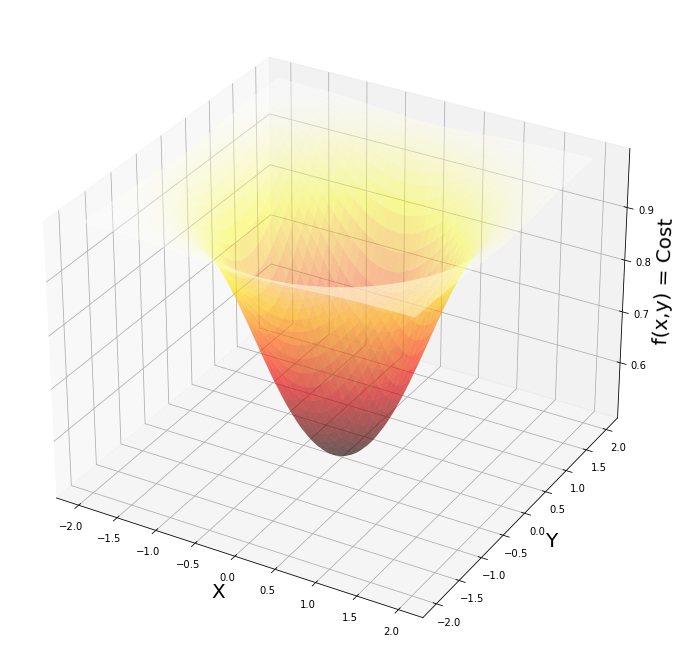

In [120]:
# Generating 3D Plot

fig = plt.figure(figsize=(16,12))

ax = fig.gca(projection='3d')

ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.hot,alpha=0.4)
ax.set_xlabel("X",fontsize=20)
ax.set_ylabel("Y",fontsize=20)
ax.set_zlabel('f(x,y) = Cost',fontsize=20)

## Partial Derivatives & Symbolic Computation

In [155]:
import math,sympy
def log(x):
    return sympy.log(x)

In [156]:
diff(log(a),a)

1/x

In [132]:
a,b = symbols('x,y')
print('Our cost function f(x,y) is: ',f(a,b))
print(diff(f(a,b),a))
f(a,b).evalf(subs={a: 1.8,b:1.0})

Our cost function f(x,y) is:  1/(3**(-x**2 - y**2) + 1)


0.990604794032582

In [134]:
diff(f(a,b),a).evalf(subs={a:1.8,b:1.0})

0.0368089716197505

# Batch gradient descent with SymPy

In [152]:
learning_rate = 0.1
max_iterations = 200
params = np.array([1.8,1.0]) #initial guesses


for i in range(max_iterations):
    gradient_x = diff(f(a,b),a).evalf(subs={a: params[0],b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a: params[0],b:params[1]})
    gradients = np.array([gradient_x,gradient_y])
    params = params - learning_rate * gradients
    
print(gradients)
print(params[0],params[1])
print(f(params[0],params[1]))

[0.000461440542096373 0.000256355856720208]
0.000793898510134722 0.000441054727852623
0.500000226534985


In [159]:
def df_x(x,y):
    return (2 * x * math.log(3) * 3**(-x**2 -y**2))/(3**(-x**2-y**2) + 1)**2

def df_y(x,y):
        return (2 * y * math.log(3) * 3**(-x**2 -y**2))/(3**(-x**2-y**2) + 1)**2


In [160]:
learning_rate = 0.1
max_iterations = 200
params = np.array([1.8,1.0]) #initial guesses


for i in range(max_iterations):
    gradient_x = df_x(params[0],params[1])
    gradient_y = df_y(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - learning_rate * gradients
    
print(gradients)
print(params[0],params[1])
print(f(params[0],params[1]))

[0.00046144 0.00025636]
0.0007938985101347202 0.0004410547278526219
0.5000002265349848


## Graphing 3D Gradient Descent & Advanced Numpy Arrays

In [207]:
learning_rate = 0.1
max_iterations = 200
params = np.array([-2.5,1.0]) #initial guesses


values_array = params.reshape(1,2)
print(values_array.shape)
for i in range(max_iterations):
    gradient_x = df_x(params[0],params[1])
    gradient_y = df_y(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - learning_rate * gradients
    values_array = np.append(values_array,params.reshape(1,2),axis=0) # np.concatenate((values_array,params.reshape(1,2)),axis=0)
    
print(gradients)
print(params[0],params[1])
print(f(params[0],params[1]))

(1, 2)
[-0.00245829  0.00098332]
-2.456790450446028 0.9827161801784098
0.9995437390636255


Text(0.5, 0, 'f(x,y) = Cost')

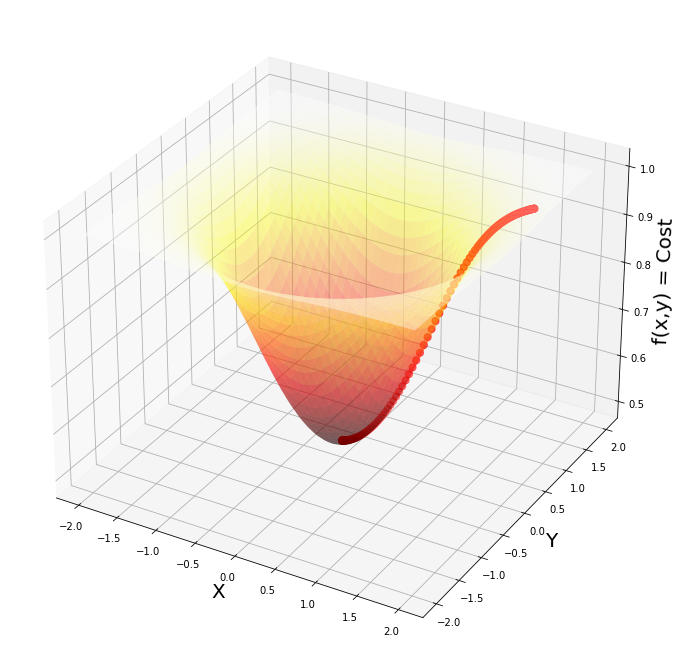

In [205]:
# Generating 3D Plot

fig = plt.figure(figsize=(16,12))

ax = fig.gca(projection='3d')

ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.hot,alpha=0.4)
ax.scatter(values_array[:,0],values_array[:,1],f(values_array[:,0],values_array[:,1]),color='red',s=50)
ax.set_xlabel("X",fontsize=20)
ax.set_ylabel("Y",fontsize=20)
ax.set_zlabel('f(x,y) = Cost',fontsize=20)

In [165]:
kirk = np.array([['Captain','Guitar']])

In [166]:
kirk

array([['Captain', 'Guitar']], dtype='<U7')

In [167]:
kirk.shape

(1, 2)

In [169]:
hs_band = np.array([['Black Thought','MC'],['Questlove','Drums']])
print(hs_band.shape)
hs_band

(2, 2)


array([['Black Thought', 'MC'],
       ['Questlove', 'Drums']], dtype='<U13')

In [174]:
hs_band[1,0]

'Questlove'

In [ ]:
the_roots = np.append(hs_band,values=kirk,axis=0)

In [178]:
the_roots

array([['Black Thought', 'MC'],
       ['Questlove', 'Drums'],
       ['Captain', 'Guitar']], dtype='<U13')

In [179]:
the_roots[:,0]

array(['Black Thought', 'Questlove', 'Captain'], dtype='<U13')

In [181]:
the_roots = np.append(arr=the_roots,values=[['Malik B','MC']],axis=0)

In [182]:
the_roots[:,1]

array(['MC', 'Drums', 'Guitar', 'MC'], dtype='<U13')

In [183]:
the_roots.

array([['Black Thought', 'MC'],
       ['Questlove', 'Drums'],
       ['Captain', 'Guitar'],
       ['Malik B', 'MC']], dtype='<U13')

In [192]:
np.append(the_roots,np.array(['Hello','there','hello','there']).reshape(-1,1),axis=1)

array([['Black Thought', 'MC', 'Hello'],
       ['Questlove', 'Drums', 'there'],
       ['Captain', 'Guitar', 'hello'],
       ['Malik B', 'MC', 'there']], dtype='<U13')

In [193]:
x = np.array([1,2,3])

In [198]:
np.expand_dims(x,axis=0)

array([[1, 2, 3]])

In [225]:
f(np.array([-2.5,-2.49]),np.array([1,0.99992371]))

array([0.99965269, 0.99963306])

In [223]:
values_array[:,0][:5]

array([-2.5       , -2.49980929, -2.49961835, -2.4994272 , -2.49923584])

In [224]:
values_array[:,1][:5]

array([1.        , 0.99992371, 0.99984734, 0.99977088, 0.99969433])

# Working with Data & a Real Cost Function

## Mean squared error: a cost function for regression problems

### $$RSS=\sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE=\frac{1}{n}\sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE=\frac{1}{n}\sum_{i=1}^{n} \big(y - \hat{y} \big)^2 $$

In [312]:
x_5 = np.array([0.1,1.2,2.4,3.2,4.1,5.7,6.5]).reshape(7,1)
y_5 = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1)
print(x_5.shape)
print(y_5.shape)

(7, 1)
(7, 1)


In [315]:
lr = LinearRegression()
lr.fit(x_5,y_5)

LinearRegression()

In [316]:
lr.intercept_

array([0.84753515])

In [317]:
lr.coef_

array([[1.22272646]])

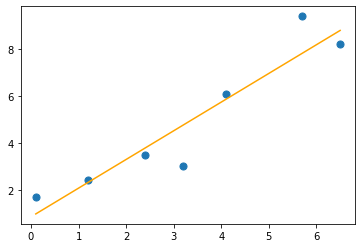

In [243]:
plt.scatter(x_5,y_5,s=50)
plt.plot(x_5,lr.predict(x_5),color='orange')

In [318]:
y_hat = lr.intercept_[0] + lr.coef_[0][0]* x_5
print(y_hat)
print(y_5)

[[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
[[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [261]:
def mse(y,y_hat):
    
    return (np.sum((y-y_hat)**2)) / y.shape[0]

In [319]:
mean_squared_error(y_5,y_hat)

0.9479655759794577

# 3D Plot for the MSE Cost Functio

In [285]:
n = 200
theta_0 = np.linspace(start=-1,stop=3,num=n)
theta_1 = np.linspace(start=-1,stop=3,num=n)

plot_t0,plot_t1 = np.meshgrid(theta_0,theta_1)

In [281]:
plot_t0

array([[-1.,  0.,  1.,  2.,  3.],
       [-1.,  0.,  1.,  2.,  3.],
       [-1.,  0.,  1.,  2.,  3.],
       [-1.,  0.,  1.,  2.,  3.],
       [-1.,  0.,  1.,  2.,  3.]])

In [282]:
plot_t1

array([[-1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.]])

In [286]:
plot_cost = np.zeros((n,n))
plot_cost

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [287]:
for row in range(n):
    for col in range(n):
        y_hat = plot_t0[row][col] + plot_t1[row][col] * x_5
        plot_cost[row][col] = mse(y_5,y_hat)
        



In [283]:
plot_cost

array([[108.51285714,  91.08428571,  75.65571429,  62.22714286,
         50.79857143],
       [ 42.61571429,  31.81571429,  23.01571429,  16.21571429,
         11.41571429],
       [  7.86142857,   3.69      ,   1.51857143,   1.34714286,
          3.17571429],
       [  4.25      ,   6.70714286,  11.16428571,  17.62142857,
         26.07857143],
       [ 31.78142857,  40.86714286,  51.95285714,  65.03857143,
         80.12428571]])

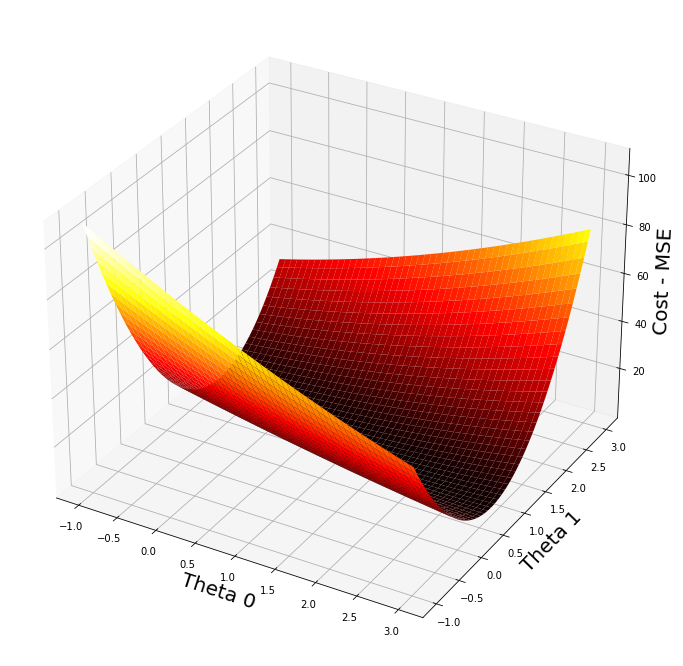

In [289]:
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.set_xlabel("Theta 0",fontsize=20)
ax.set_ylabel("Theta 1",fontsize=20)
ax.set_zlabel("Cost - MSE",fontsize=20)
ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.hot)
plt.show()

In [290]:
print(plot_cost.min())

0.9483826526747164


In [294]:
ij_min = np.unravel_index(indices=plot_cost.argmin(),shape=plot_cost.shape)

In [292]:
plot_cost.argmin()

22291

In [295]:
ij_min

(111, 91)

In [300]:
plot_t0[111][91]

0.829145728643216

In [301]:
plot_t1[111,91]

1.2311557788944723

# Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^n \big(y^{(i)} - \theta_0 - \theta_1x^{(i)}\big) $$

## $$\frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^n \big(y^{(i)} - \theta_0 - \theta_1x^{(i)}\big)x^{(i)}$$

## MSE & Gradient Descent

In [324]:
def grad(x,y,thetas):
    n = y.shape[0]
    theta_0,theta_1 = thetas
    theta0_slope = (-2/n) * np.sum(y - theta_0 - theta_1 * x)
    theta1_slope = (-2/n) * np.sum((y - theta_0 - theta_1 * x) * x)
    
    return np.array([theta0_slope,theta1_slope])

In [347]:
learning_rate = 0.01
thetas = np.array([2.9,2.9])
n = 1000
plot_vals = thetas.reshape(1,2)
mse_values = [mse(y_5,thetas[0] + thetas[1] * x_5)]
for _ in range(n):
    thetas = thetas - learning_rate * grad(x_5,y_5,thetas)
    plot_vals = np.concatenate((plot_vals,thetas.reshape(1,2)),axis=0)
    mse_values.append(mse(y_5,thetas[0] + thetas[1] * x_5))#np.append(arr=mse_values,values=mse(y_5,thetas[0] + thetas[1] * x_5))

    
print('Min occurs at Theta 0',thetas[0])
print('Min occurs at Theta 1',thetas[1])
print('MSE is',mse(y_5,thetas[0] + thetas[1] * x_5))

Min occurs at Theta 0 0.8532230461743415
Min occurs at Theta 1 1.2214935332607393
MSE is 0.9479751138321334


In [352]:
np.array(mse_values).reshape(1,-1)

array([[71.786     , 33.55719479, 16.17569629, ...,  0.94797533,
         0.94797522,  0.94797511]])

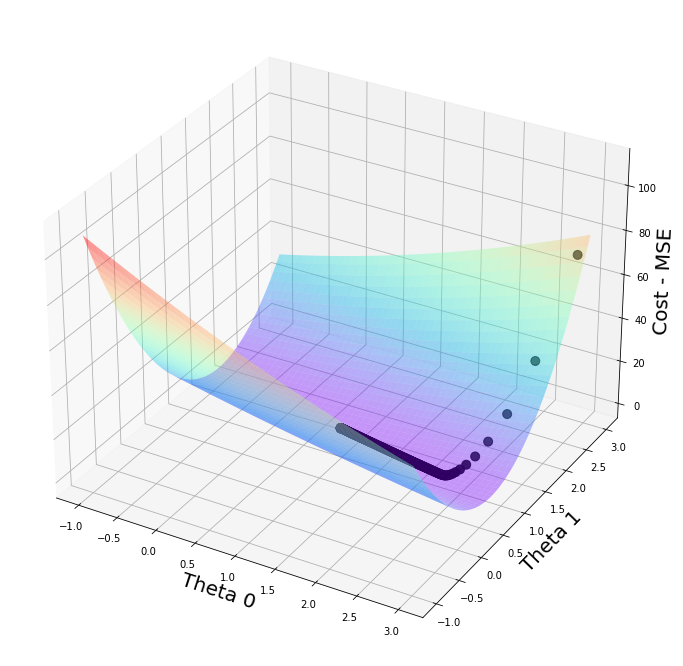

In [355]:
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.set_xlabel("Theta 0",fontsize=20)
ax.set_ylabel("Theta 1",fontsize=20)
ax.set_zlabel("Cost - MSE",fontsize=20)

ax.scatter(plot_vals[:,0],plot_vals[:,1],mse_values,s=80,color='black')
ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.rainbow,alpha=0.4)
plt.show()